In [1]:
# seaborn 데이터셋 확인
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
# 데이터샘플 중 팁 데이터(tips) 가져오고 확인하기
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# 문자열 값을 가지는 컬럼들을 대상으로 값을 실수화 처리하기
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [4]:
# Dataframe에서 `tips` 컬럼을 맨 오른쪽으로 설정하기
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


In [5]:
# 다양한 데이터를 설정하고 학습을 시작해보기
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [6]:
# scikit-learn 모듈의 train_test_split으로 데이터 분리해보기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [7]:
# 파라미터를 기반으로 Weight는 12, Bias는 1로 설정함; 이 때 Weight의 값은 벡터이므로 W로 표시
import numpy as np
W = np.random.rand(12)
b = np.random.rand()

In [8]:
# W 값 확인
W

array([0.10207372, 0.853713  , 0.61700523, 0.26014025, 0.32341736,
       0.08404216, 0.5670889 , 0.90022925, 0.05391746, 0.17216094,
       0.037973  , 0.28975937])

In [9]:
# b 값 확인
b

0.44403962237170225

In [10]:
# 12개의 Weight로 예측되는 예측값 predictions를 반환하는 모델 생성
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [11]:
# 손실함수로 MSE를 선언
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [12]:
# 손실함수로 MSE를 선언
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [13]:
# 다양한 데이터별 기울기(gradient)를 계산하는 함수 선언
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [14]:
# 경사(gradient) 테스트
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [120.37789864  15.78301182   3.85618903   1.80545921   2.25633778
   3.40531046   1.40370142   0.47897605   1.94815606   1.8308147
   1.5411836    4.12046464]
db: 5.661648239631078


In [15]:
# 학습 진행을 위한 학습률 설정
LEARNING_RATE = 0.0001

In [16]:
# 1000번 학습
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2.7964
Iteration 20 : Loss 1.9763
Iteration 30 : Loss 1.8717
Iteration 40 : Loss 1.8563
Iteration 50 : Loss 1.8519
Iteration 60 : Loss 1.8490
Iteration 70 : Loss 1.8462
Iteration 80 : Loss 1.8435
Iteration 90 : Loss 1.8408
Iteration 100 : Loss 1.8381
Iteration 110 : Loss 1.8354
Iteration 120 : Loss 1.8328
Iteration 130 : Loss 1.8301
Iteration 140 : Loss 1.8275
Iteration 150 : Loss 1.8248
Iteration 160 : Loss 1.8222
Iteration 170 : Loss 1.8196
Iteration 180 : Loss 1.8170
Iteration 190 : Loss 1.8144
Iteration 200 : Loss 1.8118
Iteration 210 : Loss 1.8092
Iteration 220 : Loss 1.8067
Iteration 230 : Loss 1.8041
Iteration 240 : Loss 1.8016
Iteration 250 : Loss 1.7990
Iteration 260 : Loss 1.7965
Iteration 270 : Loss 1.7940
Iteration 280 : Loss 1.7915
Iteration 290 : Loss 1.7890
Iteration 300 : Loss 1.7866
Iteration 310 : Loss 1.7841
Iteration 320 : Loss 1.7816
Iteration 330 : Loss 1.7792
Iteration 340 : Loss 1.7767
Iteration 350 : Loss 1.7743
Iteration 360 : Loss 1.7719
I

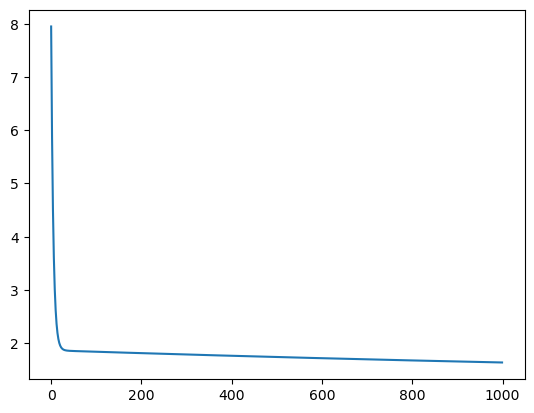

In [17]:
# 학습데이터 현황을 그래프로 그려보기
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [18]:
# 이 때의 W, b값 확인해보기
W, b

(array([2.35649517e-04, 7.17415488e-01, 5.76502032e-01, 2.44739624e-01,
        2.93992589e-01, 5.75631039e-02, 5.44498757e-01, 8.85096425e-01,
        4.60728577e-02, 1.61824683e-01, 7.71007025e-03, 2.64118483e-01]),
 0.38813579912611523)

In [19]:
# 학습하지 않은 데이터(test)에 대해 검증하기
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

1.3413962886917083

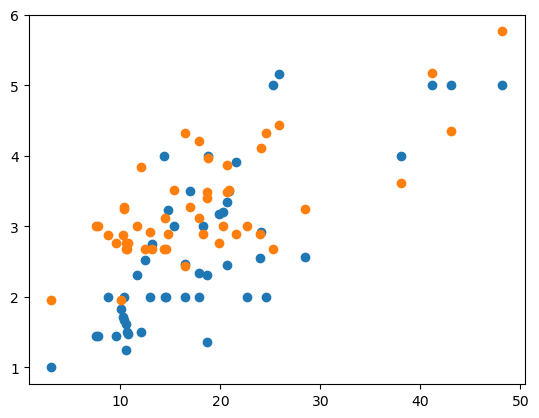

In [20]:
# X_test 데이터 시각화하기
## X_test의 각 행의 첫 번째 데이터는 total_bill
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

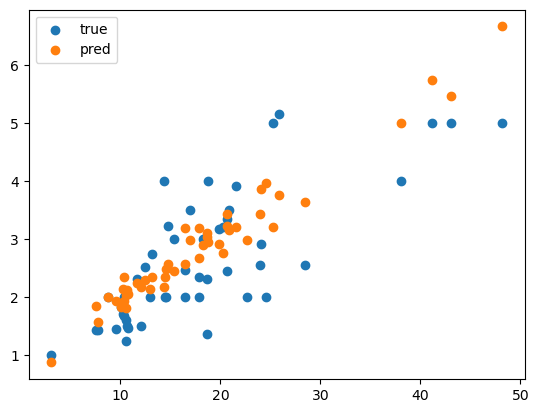

In [21]:
# scikit learn으로 데이터 학습 및 예측값 계산, 검증 수행해보기
# 1. 데이터 불러오기
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

# 2. X, y 값 설정하기
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

# 3. 데이터 분리 (train, test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. scikit learn의 선형 회귀(Linear Regression)모델 사용하기
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 5. 모델 학습
model.fit(X_train, y_train)

# 6. X_test 데이터 예측
predictions = model.predict(X_test)
predictions

# 7. 정답 데이터와 예측값 비교
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

# 8. 데이터 시각화 (x-axis is total bill, y-axis is tip)
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()